
# Social footprinting with EXIOBASE

* Author: Bertram F. de Boer (1), Hanie Zarafshani (2), and Bo P. Weidema (1)
* Kernel: `conference`
* License: [CC-BY-SA-4.0](https://creativecommons.org/licenses/by-sa/4.0/)
* Date: 2023-02-15

(1) 2.-0 LCA consultants (www.lca-net.com)
(2) KU Leuven, Belgium

This Jupyter Notebook will allow us to calculate social footprints with EXIOBASE. First, we will parse the different elements from EXIOBASE that we need for the calculations. Next, we will calculate the Leontief inverse and social footprint coefficients. Finally, we will multiply final demand with the Leontief inverse and the social footprint coefficients to calculate the social footprint elements caused by EXIOBASE global final demand.

In the second part of the Jupyter Notebook, contribution analyses are made for differnet elements and aggregates of the social footprint elements.

In [1]:
"""
Sets up variables for the EXIOBASE social footprint analysis.

new_folder_name (str): The name of the folder to store the results in.
max_y (int): The maximum y-axis value for plots. Set to -1 for dynamic plots.
dollar_per_euro (float): The exchange rate between dollars and euros.
"""

new_folder_name = 'Result'
max_y = 100
dollar_per_euro = 1.153

In [2]:
"""
Import necessary libraries for data analysis and visualization.

This code imports numpy, pandas, and matplotlib.pyplot libraries for data analysis and visualization.
It also imports the pathlib library for working with file paths.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
# Create a new directory for storing Excel files.
# result_excel_path (str): The name of the new folder to be created.

result_excel_path = new_folder_name + '/xlsx/'
Path(result_excel_path).mkdir(parents=True, exist_ok=True)

In [4]:
"""
Defines file paths for the different EXIOBASE elements.

eb_z_path (str): path to the by-product technology matrix csv file.
eb_y_path (str): path to the final demand matrix csv file.
eb_x_pp_path (str): path to the principal production matrix csv file.
eb_sf_path (str): path to the social footprint csv file.
eb_y_xlsx_path (str): path to the Excel workbook with editable final demand vector.
"""
data_dir = Path("/srv/data/exiobase/")
cur_dir = Path.cwd()

eb_z_path = data_dir / "MR_HIOT_2011_v3_3_18_by_product_technology.csv"
eb_y_path = data_dir / "MR_HIOT_2011_v3_3_18_FD.csv"
eb_x_pp_path = data_dir / "MR_HIOT_2011_v3_3_18_principal_production.csv"

sf_date = '20230216'
eb_sf_path = cur_dir / f"social_footprint_{sf_date}.csv"

# Define path for Excel workbook with editable final demand vector.
eb_y_xlsx_path = cur_dir / 'final_demand.xlsx'

In [5]:
# Parse transactional matrix. This takes a couple of seconds.
df_tz = pd.read_csv(eb_z_path, index_col=[0, 1, 2, 3, 4], header=[0, 1, 2, 3])
df_tz

AU  \
                                                                         Cultivation of paddy rice   
                                                                                             i01.a   
                                                                                            A_PARI   
AU Paddy rice                                        p01.a C_PARI tonnes                  0.000000   
   Wheat                                             p01.b C_WHEA tonnes                  0.000000   
   Cereal grains nec                                 p01.c C_OCER tonnes                  0.000000   
   Vegetables, fruit, nuts                           p01.d C_FVEG tonnes                  0.000000   
   Oil seeds                                         p01.e C_OILS tonnes                  0.000000   
...                                                                                            ...   
WM Membership organisation services n.e.c. (91)      p91   C_ORGA Meuro                   0.000351   
   Recreational, cultural and sporting services (92) p92   C_RECR Meuro                   0.000000   
   Other services (93)                               p93   C_OSER Meuro                   0.000060   
   Private households with employed persons (95)     p95   C_PRHH Meuro                   0.000000   
   Extra-territorial organizations and bodies        p99   C_EXTO Meuro                   0.000000   

                                                                                               \
                                                                         Cultivation of wheat   
                                                                                        i01.b   
                                                                                       A_WHEA   
AU Paddy rice                                        p01.a C_PARI tonnes             0.000000   
   Wheat                                             p01.b C_WHEA tonnes             0.000000   
   Cereal grains nec                                 p01.c C_OCER tonnes             0.000000   
   Vegetables, fruit, nuts                           p01.d C_FVEG tonnes             0.000000   
   Oil seeds                                         p01.e C_OILS tonnes             0.000000   
...                                                                                       ...   
WM Membership organisation services n.e.c. (91)      p91   C_ORGA Meuro              0.001041   
   Recreational, cultural and sporting services (92) p92   C_RECR Meuro              0.000148   
   Other services (93)                               p93   C_OSER Meuro              0.000216   
   Private households with employed persons (95)     p95   C_PRHH Meuro              0.000000   
   Extra-territorial organizations and bodies        p99   C_EXTO Meuro              0.000000   

                                                                                                           \
                                                                         Cultivation of cereal grains nec   
                                                                                                    i01.c   
                                                                                                   A_OCER   
AU Paddy rice                                        p01.a C_PARI tonnes                         0.000000   
   Wheat                                             p01.b C_WHEA tonnes                         0.000000   
   Cereal grains nec                                 p01.c C_OCER tonnes                     70942.965470   
   Vegetables, fruit, nuts                           p01.d C_FVEG tonnes                         0.000000   
   Oil seeds                                         p01.e C_OILS tonnes                         0.000000   
...                                                                                                   ...   
WM Membership organ

In [6]:
# Parse final demand matrix.
df_ty = pd.read_csv(eb_y_path, index_col=[0, 1, 2, 3, 4], header=[0, 1, 2, 3])
df_ty

AU  \
                                                                         Final consumption expenditure by households   
                                                                                                                 y01   
                                                                                                              F_HOUS   
AU Paddy rice                                        p01.a C_PARI tonnes                                0.000000e+00   
   Wheat                                             p01.b C_WHEA tonnes                                0.000000e+00   
   Cereal grains nec                                 p01.c C_OCER tonnes                                0.000000e+00   
   Vegetables, fruit, nuts                           p01.d C_FVEG tonnes                                1.255628e+06   
   Oil seeds                                         p01.e C_OILS tonnes                                7.501443e+02   
...                                                                                                              ...   
WM Membership organisation services n.e.c. (91)      p91   C_ORGA Meuro                                 2.433216e+00   
   Recreational, cultural and sporting services (92) p92   C_RECR Meuro                                 1.505084e+01   
   Other services (93)                               p93   C_OSER Meuro                                 6.225243e+00   
   Private households with employed persons (95)     p95   C_PRHH Meuro                                 0.000000e+00   
   Extra-territorial organizations and bodies        p99   C_EXTO Meuro                                 0.000000e+00   

                                                                                                                                                               \
                                                                         Final consumption expenditure by non-profit organisations serving households (NPISH)   
                                                                                                                                                        y02.a   
                                                                                                                                                       F_NPSH   
AU Paddy rice                                        p01.a C_PARI tonnes                                           0.000000                                     
   Wheat                                             p01.b C_WHEA tonnes                                      317232.259200                                     
   Cereal grains nec                                 p01.c C_OCER tonnes                                       20796.255720                                     
   Vegetables, fruit, nuts                           p01.d C_FVEG tonnes                                        9066.727501                                     
   Oil seeds                                         p01.e C_OILS tonnes                                         414.340678                                     
...                                                                                                                     ...                                     
WM Membership organisation services n.e.c. (91)      p91   C_ORGA Meuro                                            0.292635                                     
   Recreational, cultural and sporting services (92) p92   C_RECR Meuro                                            3.926284                                     
   Other services (93)                               p93   C_OSER Meuro                                            0.002373                                     
   Private households with employed persons (95)     p95   C_PRHH Meuro                                            0.000000                                     
   Extra-territorial organizations and bodies        p99   

In [7]:
# Parse principal production matrix.
"""
df_tx_raw (pandas.DataFrame): The raw principal production matrix DataFrame.
df_tx (pandas.Series): The parsed principal production matrix Series.
"""

df_tx_raw = pd.read_csv(eb_x_pp_path, header=list(range(8)))
df_tx = df_tx_raw.loc[0]
df_tx_raw

AU                       \
  Cultivation of paddy rice Cultivation of wheat   
                      i01.a                i01.b   
                     A_PARI               A_WHEA   
                 Paddy rice                Wheat   
                      p01.a                p01.b   
                     C_PARI               C_WHEA   
                     tonnes               tonnes   
0                 614790.55           23298564.6   

                                                                           \
  Cultivation of cereal grains nec Cultivation of vegetables, fruit, nuts   
                             i01.c                                  i01.d   
                            A_OCER                                 A_FVEG   
                 Cereal grains nec                Vegetables, fruit, nuts   
                             p01.c                                  p01.d   
                            C_OCER                                 C_FVEG   
                            tonnes                                 tonnes   
0                      10091072.52                            3256923.201   

                                                                  \
  Cultivation of oil seeds Cultivation of sugar cane, sugar beet   
                     i01.e                                 i01.f   
                    A_OILS                                A_SUGB   
                 Oil seeds                Sugar cane, sugar beet   
                     p01.e                                 p01.f   
                    C_OILS                                C_SUGB   
                    tonnes                                tonnes   
0               1054723.43                             7554544.2   

                                                                             \
  Cultivation of plant-based fibers Cultivation of crops nec Cattle farming   
                              i01.g                    i01.h          i01.i   
                             A_FIBR                   A_OTCR         A_CATL   
                 Plant-based fibers                Crops nec         Cattle   
                              p01.g                    p01.h          p01.i   
                             C_FIBR                   C_OTCR         C_CATL   
                             tonnes                   tonnes         tonnes   
0                       777203.7683              1690.108786    1145042.828   

                ...                            WM  \
  Pigs farming  ...      Landfill of waste: Paper   
         i01.j  ...                       i90.5.b   
        A_PIGS  ...                        A_LANP   
          Pigs  ... Paper for treatment: landfill   
         p01.j  ...                       p90.5.b   
        C_PIGS  ...                        C_LANP   
        tonnes  ...              tonnes (service)   
0  220723.3765  ...                   519392.9146   

                                         \
             Landfill of waste: Plastic   
                                i90.5.c   
                                 A_LANL   
  Plastic waste for treatment: landfill   
                                p90.5.c   
                                 C_LANL   
                       tonnes (service)   
0                           48188.92033   

                                                       \
             Landfill of waste: Inert/metal/hazardous   
                                              i90.5.d   
                                               A_LANI   
  Inert/metal/hazardous waste for treatment: landfill   
                                              p90.5.d   
                                               C_LANI   
                                     tonnes (service)   
0                                        287464082.2    

                                                                             \
             Landfill of waste: Textiles            Landfill of waste: Wood   

In [8]:
# Parse social footprint extension.
df_tsf = pd.read_csv(eb_sf_path, header=[0, 1, 2, 3], index_col=[0, 1], sep="\t")
df_tsf

AU  \
                                                                                                      Cultivation of paddy rice   
                                                                                                                          i01.a   
                                                                                                                         A_PARI   
N1                                                 Sub-soil ressource use                                              1.121258   
N2                                                 Marine biomass and biodiversity, global warming                    29.198920   
N3                                                 Marine biomass and biodiversity, overexploitation                   3.201755   
N4                                                 Freshwater biomass and biodiversity, global war...                 32.716862   
N5                                                 Freshwater biomass and biodiversity, overexploi...                  3.394482   
...                                                                                                                         ...   
S24                                                Discrimination                                                     56.217941   
H35                                                Health impacts, global warming (partly increase...                357.571687   
Value Added                                        Meuro2011                                                         155.841750   
Sum direct income by industry                      Meuro2011                                                         152.487121   
Globally equity-weighted direct income by indus... Meuro2011                                                          22.266770   

                                                                                                                            \
                                                                                                      Cultivation of wheat   
                                                                                                                     i01.b   
                                                                                                                    A_WHEA   
N1                                                 Sub-soil ressource use                                        31.130390   
N2                                                 Marine biomass and biodiversity, global warming              151.719111   
N3                                                 Marine biomass and biodiversity, overexploitation             88.892907   
N4                                                 Freshwater biomass and biodiversity, global war...           169.998521   
N5                                                 Freshwater biomass and biodiversity, overexploi...            94.243739   
...                                                                                                                    ...   
S24                                                Discrimination                                              3476.451902   
H35                                                Health impacts, global warming (partly increase...          1857.961111   
Value Added                                        Meuro2011                                                   4409.049147   
Sum direct income by industry                      Meuro2011                                                   4233.622583   
Globally equity-weighted direct income by indus... Meuro2011                                                   1376.951094   

                                                                                                                                        \
                                                                                                      Cultivation of cereal grains

In [9]:
# Construct 1/x array for future calculations.
array_tx = df_tx.values
array_tx[array_tx == 0] = np.nan
array_tx_inv = 1 / array_tx

# Replace nan with zero, due to div by zero.
array_tx_inv[np.isnan(array_tx_inv)] = 0

In [10]:
"""
df_tz: A pandas DataFrame representing the technical coefficient matrix.
array_tx_inv: A numpy ndarray representing the inverse of the total output matrix.
"""
# Construct technical coefficient matrix.
df_ca = df_tz * array_tx_inv

# Construct Leontief inverse. This takes a couple of seconds.
array_ci = np.eye(df_ca.shape[0])
array_cl = np.linalg.inv(array_ci - df_ca)
df_cl = pd.DataFrame(array_cl, index=df_ca.columns, columns=df_ca.columns)
# A pandas DataFrame representing the Leontief inverse matrix.
df_cl

AU  \
                                                                   Cultivation of paddy rice   
                                                                                       i01.a   
                                                                                      A_PARI   
                                                                                               
AU Cultivation of paddy rice                          i01.a A_PARI              1.000009e+00   
   Cultivation of wheat                               i01.b A_WHEA              2.150478e-04   
   Cultivation of cereal grains nec                   i01.c A_OCER              8.788124e-05   
   Cultivation of vegetables, fruit, nuts             i01.d A_FVEG              2.027112e-05   
   Cultivation of oil seeds                           i01.e A_OILS              8.774968e-06   
...                                                                                      ...   
WM Activities of membership organisation n.e.c. (91)  i91   A_ORGA              6.678162e-10   
   Recreational, cultural and sporting activities ... i92   A_RECR              1.141384e-09   
   Other service activities (93)                      i93   A_OSER              8.216152e-10   
   Private households with employed persons (95)      i95   A_PRHH              0.000000e+00   
   Extra-territorial organizations and bodies         i99   A_EXTO              0.000000e+00   

                                                                                         \
                                                                   Cultivation of wheat   
                                                                                  i01.b   
                                                                                 A_WHEA   
                                                                                          
AU Cultivation of paddy rice                          i01.a A_PARI         7.913574e-06   
   Cultivation of wheat                               i01.b A_WHEA         1.000192e+00   
   Cultivation of cereal grains nec                   i01.c A_OCER         8.095575e-05   
   Cultivation of vegetables, fruit, nuts             i01.d A_FVEG         1.850913e-05   
   Cultivation of oil seeds                           i01.e A_OILS         1.025568e-05   
...                                                                                 ...   
WM Activities of membership organisation n.e.c. (91)  i91   A_ORGA         1.345860e-10   
   Recreational, cultural and sporting activities ... i92   A_RECR         1.044627e-09   
   Other service activities (93)                      i93   A_OSER         8.813480e-10   
   Private households with employed persons (95)      i95   A_PRHH         0.000000e+00   
   Extra-territorial organizations and bodies         i99   A_EXTO         0.000000e+00   

                                                                                                     \
                                                                   Cultivation of cereal grains nec   
                                                                                              i01.c   
                                                                                             A_OCER   
                                                                                                      
AU Cultivation of paddy rice                          i01.a A_PARI                     5.588008e-06   
   Cultivation of wheat                               i01.b A_WHEA                     1.364229e-04   
   Cultivation of cereal grains nec                   i01.c A_OCER                     1.007140e+00   
   Cultivation of vegetables, fruit, nuts             i01.d A_FVEG                     1.223859e-05   
   Cultivation of oil seeds                           i01.e A_OILS                     2.446667e-05   
...                                                               

In [11]:
# Harmonize index of final demand matrix with columns of Leontief inverse.
# This is needed to take dot product with pandas, as these need to match.
df_ty.index = df_cl.columns

In [12]:
# Calculate coefficients for social footprint
df_csf = df_tsf * array_tx_inv
df_csf

AU  \
                                                                                                      Cultivation of paddy rice   
                                                                                                                          i01.a   
                                                                                                                         A_PARI   
N1                                                 Sub-soil ressource use                                              0.000002   
N2                                                 Marine biomass and biodiversity, global warming                     0.000047   
N3                                                 Marine biomass and biodiversity, overexploitation                   0.000005   
N4                                                 Freshwater biomass and biodiversity, global war...                  0.000053   
N5                                                 Freshwater biomass and biodiversity, overexploi...                  0.000006   
...                                                                                                                         ...   
S24                                                Discrimination                                                      0.000091   
H35                                                Health impacts, global warming (partly increase...                  0.000582   
Value Added                                        Meuro2011                                                           0.000253   
Sum direct income by industry                      Meuro2011                                                           0.000248   
Globally equity-weighted direct income by indus... Meuro2011                                                           0.000036   

                                                                                                                            \
                                                                                                      Cultivation of wheat   
                                                                                                                     i01.b   
                                                                                                                    A_WHEA   
N1                                                 Sub-soil ressource use                                         0.000001   
N2                                                 Marine biomass and biodiversity, global warming                0.000007   
N3                                                 Marine biomass and biodiversity, overexploitation              0.000004   
N4                                                 Freshwater biomass and biodiversity, global war...             0.000007   
N5                                                 Freshwater biomass and biodiversity, overexploi...             0.000004   
...                                                                                                                    ...   
S24                                                Discrimination                                                 0.000149   
H35                                                Health impacts, global warming (partly increase...             0.000080   
Value Added                                        Meuro2011                                                      0.000189   
Sum direct income by industry                      Meuro2011                                                      0.000182   
Globally equity-weighted direct income by indus... Meuro2011                                                      0.000059   

                                                                                                                                        \
                                                                                                      Cultivation of cereal grains

In [13]:
# Calculate social footprint of final demand
df_tsf_x = df_csf.dot(df_cl.dot(df_ty.groupby(level=0,axis=1).sum()))
df_tsf_x.to_excel('tsf_x.xlsx')
df_tsf_x

/tmp/ipykernel_300783/3341336034.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_tsf_x = df_csf.dot(df_cl.dot(df_ty.groupby(level=0,axis=1).sum()))


,,AT,AU,BE,BG,BR,CA,CH,CN,CY,CZ,...,SI,SK,TR,US,WA,WE,WF,WL,WM,ZA
N1,Sub-soil ressource use,5446.148715,1.546550e+04,7.609928e+03,2440.912080,7.021895e+04,1.638155e+04,7.743813e+03,4.152514e+05,840.857821,5339.858632,...,1804.146219,3382.190480,2.740261e+04,1.583960e+05,2.576132e+05,2.544046e+04,2.361088e+05,8.958502e+04,1.012855e+05,1.828756e+04
N2,"Marine biomass and biodiversity, global warming",3549.199581,1.697696e+04,5.199613e+03,1843.891191,3.738699e+04,1.894521e+04,4.595917e+03,3.566995e+05,617.119442,4495.156314,...,1398.196809,4046.560436,1.776103e+04,2.079255e+05,9.592627e+04,1.937950e+04,4.095582e+04,4.262135e+04,7.349702e+04,1.138719e+04
N3,"Marine biomass and biodiversity, overexploitation",15551.491099,4.416177e+04,2.173017e+04,6970.030470,2.005104e+05,4.677755e+04,2.211248e+04,1.185751e+06,2401.071585,15247.979506,...,5151.743982,9657.853264,7.824821e+04,4.523001e+05,7.356151e+05,7.264529e+04,6.742093e+05,2.558102e+05,2.892210e+05,5.222016e+04
N4,"Freshwater biomass and biodiversity, global warming",3976.813989,1.902238e+04,5.826073e+03,2066.046756,4.189145e+04,2.122776e+04,5.149641e+03,3.996754e+05,691.471182,5036.741413,...,1566.654256,4534.097838,1.990092e+04,2.329767e+05,1.074837e+05,2.171438e+04,4.589026e+04,4.775646e+04,8.235209e+04,1.275914e+04
N5,"Freshwater biomass and biodiversity, overexploitation",16487.599848,4.682005e+04,2.303820e+04,7389.585511,2.125799e+05,4.959328e+04,2.344352e+04,1.257127e+06,2545.602042,16165.818633,...,5461.848819,10239.199507,8.295830e+04,4.795260e+05,7.798948e+05,7.701812e+04,7.147928e+05,2.712085e+05,3.066304e+05,5.536351e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S24,Discrimination,926081.840410,2.396968e+06,1.279156e+06,506388.406429,1.075794e+07,2.582747e+06,1.072248e+06,9.727254e+07,194402.505710,872599.476037,...,344048.602272,580104.621332,6.865915e+06,2.108990e+07,4.646432e+07,5.266339e+06,5.358250e+07,1.558319e+07,2.667983e+07,4.124845e+06
H35,"Health impacts, global warming (partly increases in future impacts)",43463.705877,2.079009e+05,6.367477e+04,22580.399483,4.578433e+05,2.320041e+05,5.628186e+04,4.368163e+06,7557.280824,55047.947418,...,17122.399984,49554.416031,2.175026e+05,2.546267e+06,1.174719e+06,2.373225e+05,5.015474e+05,5.219436e+05,9.000489e+05,1.394482e+05
Value Added,Meuro2011,277224.181311,1.054997e+06,3.514821e+05,43722.889925,1.825330e+06,1.120531e+06,4.676818e+05,5.807633e+06,23138.844936,162155.256293,...,48353.336281,86592.724222,6.105076e+05,1.113281e+07,2.061753e+06,3.269311e+05,1.017628e+06,1.649815e+06,2.014089e+06,2.998230e+05
Sum direct income by industry,Meuro2011,258932.752223,9.823762e+05,3.288083e+05,39867.724800,1.666490e+06,1.032387e+06,4.270226e+05,5.174438e+06,21134.422926,150850.737404,...,44232.924248,78618.551048,5.510682e+05,1.032151e+07,1.737759e+06,2.821316e+05,8.296601e+05,1.363302e+06,1.666793e+06,2.722931e+05


# Editing final demand
Now that we have calculated the social footprint for all regions and final demand categories, we can now start calculating the social footprint of our own final demand vector.

1. Open `final_demand.xlsx` in the EXIOBASE directory, and go to sheet `FD_tutorial`. This sheet contains the sum of columns of the original final demand block (i.e. the aggregate final demand of all regions and final demand categories). 

2. Make any changes here you like (e.g. set all values to `0`, except for `AU	Wheat	p01.b	C_WHEA	tonnes AU	Wheat	2092505.474`), and **save the workbook**.

3. Now proceed with running the cells below to calculate the social footprint of your newly created final demand vector. In the Results/xlsx folder, you will find two files, the direct output in the file 'social_footprint_tutorial_output.xlsx' and the same output sorted for each column by decreasing amounts in the file 'social_footprint_sorted_output.xlsx'. The latter file also has additional coumns for diferent aggregates, e.g. for each SDG Topic, and for Potentially avoidable non-production-specific impacts (in the example given here we obtain: `Potentially avoidable non-production-specific impacts 	QALY 	6428.580`).

You can keep repeating this process by editing the `FD_tutorial` sheet, saving the workbook, highlighting the cell below and clicking `Run` until you've reached the end of the Notebook.

Finally, you can retrieve the original values by copying the contents of sheet `FD_tutorial_reference` to sheet `FD_tutorial`.

In [14]:
# Parse editable final demand vector.
df_ty_xlsx = pd.read_excel(eb_y_xlsx_path, sheet_name = 'FD_tutorial', index_col=[0, 1, 2, 3, 4], header=[0, 1, 2, 3])
df_ty_xlsx.index = df_cl.columns
df_ty_xlsx

Region x
                                                                   Final Demand
                                                                          yxx.x
                                                                            F_X
                                                                               
AU Cultivation of paddy rice                          i01.a A_PARI          0.0
   Cultivation of wheat                               i01.b A_WHEA          0.0
   Cultivation of cereal grains nec                   i01.c A_OCER          0.0
   Cultivation of vegetables, fruit, nuts             i01.d A_FVEG          0.0
   Cultivation of oil seeds                           i01.e A_OILS          0.0
...                                                                         ...
WM Activities of membership organisation n.e.c. (91)  i91   A_ORGA          0.0
   Recreational, cultural and sporting activities ... i92   A_RECR          0.0
   Other service activities (93)                      i93   A_OSER          0.0
   Private households with employed persons (95)      i95   A_PRHH          0.0
   Extra-territorial organizations and bodies         i99   A_EXTO          0.0

[7872 rows x 1 columns]

In [25]:
"""
Calculates the social footprint of editable final demand vector.

Parameters:
df_cl (pandas.DataFrame): A dataframe containing the Leontief inverse matrix.
df_ty_xlsx (pandas.DataFrame): A dataframe containing the total output.
df_csf (pandas.DataFrame): A dataframe containing the consumption-based social footprint.
result_excel_path (str): The file path where the output excel file will be saved.
sf_date (str): The date to be included in the output file name.

Returns:
df_tsf_x_tutorial (pandas.DataFrame): A dataframe containing the social footprint of editable final demand vector.
"""

# Calculate total output.
df_tx_tutorial = df_cl.dot(df_ty_xlsx)

# Diagonalize total output, so that we can investigate contributions of industries to social footprint.
df_tx_tutorial_diag = pd.DataFrame(np.diag(df_tx_tutorial.squeeze()), index = df_tx_tutorial.index, columns = df_tx_tutorial.index)

# Calculate social footprint of editable final demand vector.
df_tsf_x_tutorial = df_csf.dot(df_tx_tutorial_diag)

# Calculate sum of all rows of DataFrame.
row_sum = df_tsf_x_tutorial[:-3].sum()
row_sum.name = 'Sum'

# Assign sum of all rows of DataFrame as a new Row.
df_tsf_x_tutorial = df_tsf_x_tutorial.append(row_sum.transpose())

# Calculate sum of all columns of DataFrame.
col_sum = df_tsf_x_tutorial.sum(axis = 1)

# Assign sum of all columns of DataFrame as a new column.
df_tsf_x_tutorial['Sum'] = col_sum

# Write the output to an excel file.
writer = pd.ExcelWriter(result_excel_path + f'social_footprint_tutorial_output_{sf_date}.xlsx')
df_tsf_x_tutorial.T.to_excel(writer, sheet_name = "data", merge_cells = False)

# Return the dataframe containing the social footprint of editable final demand vector.
df_tsf_x_tutorial

C:\Users\u0135744\AppData\Local\Temp\ipykernel_14296\3342868061.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tsf_x_tutorial = df_tsf_x_tutorial.append(row_sum.transpose())


AU  \
                                                   Cultivation of paddy rice   
                                                                       i01.a   
                                                                      A_PARI   
(N1, Sub-soil ressource use)                                    6.962902e-12   
(N2, Marine biomass and biodiversity, global wa...              1.813224e-10   
(N3, Marine biomass and biodiversity, overexplo...              1.988258e-11   
(N4, Freshwater biomass and biodiversity, globa...              2.031685e-10   
(N5, Freshwater biomass and biodiversity, overe...              2.107940e-11   
...                                                                      ...   
(H35, Health impacts, global warming (partly in...              2.220485e-09   
(Value Added, Meuro2011)                                        9.677619e-10   
(Sum direct income by industry , Meuro2011)                     9.469300e-10   
(Globally equity-weighted direct income by indu...              1.382745e-10   
Sum                                                             8.885870e-09   

                                                                         \
                                                   Cultivation of wheat   
                                                                  i01.b   
                                                                 A_WHEA   
(N1, Sub-soil ressource use)                               1.195406e-10   
(N2, Marine biomass and biodiversity, global wa...         5.826010e-10   
(N3, Marine biomass and biodiversity, overexplo...         3.413485e-10   
(N4, Freshwater biomass and biodiversity, globa...         6.527938e-10   
(N5, Freshwater biomass and biodiversity, overe...         3.618957e-10   
...                                                                 ...   
(H35, Health impacts, global warming (partly in...         7.134565e-09   
(Value Added, Meuro2011)                                   1.693074e-08   
(Sum direct income by industry , Meuro2011)                1.625710e-08   
(Globally equity-weighted direct income by indu...         5.287488e-09   
Sum                                                        1.721832e-07   

                                                                                     \
                                                   Cultivation of cereal grains nec   
                                                                              i01.c   
                                                                             A_OCER   
(N1, Sub-soil ressource use)                                           6.698989e-11   
(N2, Marine biomass and biodiversity, global wa...                     2.375791e-10   
(N3, Marine biomass and biodiversity, overexplo...                     1.912898e-10   
(N4, Freshwater biomass and biodiversity, globa...                     2.662031e-10   
(N5, Freshwater biomass and biodiversity, overe...                     2.028043e-10   
...                                                                             ...   
(H35, Health impacts, global warming (partly in...                     2.909408e-09   
(Value Added, Meuro2011)                                               9.399687e-09   
(Sum direct income by industry , Meuro2011)                            9.110387e-09   
(Globally equity-weighted direct income by indu...                     1.052189e-09   
Sum                                                                    5.169339e-08   

                                                                                           \
                                                   Cultivation of vegetables, fruit, nuts   
                                                                                    i01.d   
                                                                                   A_FVEG   
(N1, Sub-soil ressource use)                                         

In [26]:
"""
Creates a new pandas DataFrame called 'extra' with 30 rows and 1 column, and initializes all values to 0.
The index of the DataFrame consists of 17 SDG categories, 3 divided categories, and 10 other categories.
The DataFrame is returned.
"""
extra = pd.DataFrame({'total' : np.zeros(30)}, index = ['sum (N1 to H35)',
                          'Potentially avoidable non-production-specific impacts',
                          'production-specific impact categories for which data sources are reasonably available',
                          'Depends on survey data','Green house gas impact','Natural assets','Manufactured physical assets',
                          'Intellectual assets','Human capabilities','Social networks','Economic','Ecosystem','Social'] + [('SDG'+str(i)) for i in range(1,18)])

In [27]:
def find_index(code, df):
    """
    Finds the index of a given code in a pandas DataFrame.

    Parameters:
    - code (str): The code to search for in the DataFrame.
    - df (pandas.DataFrame): The DataFrame to search in.

    Returns:
    - The index of the code in the DataFrame.
    """
    for v in df.index:
        if v[0] == code:
            return v


In [28]:
"""
This dictionary contains indices for various impact categories, SDGs, and asset types. Each key in the dictionary represents a category, and the corresponding value is a list of indices that belong to that category. The categories are as follows:

- sum (N1 to H35)
- Potentially avoidable non-production-specific impacts
- production-specific impact categories for which data sources are reasonably available
- Depends on survey data
- Green house gas impact
- Natural assets
- Manufactured physical assets
- Intellectual assets
- Human capabilities
- Social networks
- SDG1 to SDG17
- Economic
- Ecosystem
- Social

Note that some of the indices contain a percentage sign (%), which should be removed before using the index and the number after that shows the percentage of impact.
"""

indices = {
    'sum (N1 to H35)': [('N'+str(i)) for i in range(1,10)]+[('M'+str(i)) for i in range(1,7)]+['I1','I2']+
    [('H'+str(i)) for i in range(1,36)]+[('S'+str(i)) for i in range(1,25)],
    'Potentially avoidable non-production-specific impacts': ['M1','M2','M6','I2','H1','H5','H7','H9','H10','H18','H19','H22',
                                                              'H23','H24','H25','H26','H29','H31','H33','H34', 'S4', 'S12', 'S15']+
                                                                [('S'+str(i)) for i in range(17,25)],
    'production-specific impact categories for which data sources are reasonably available' : ['N1','N3','N5','N6','N7',
                                                                                                'N9','M4','H2','H4','H11','H14',
                                                                                               'H16','H17','H21','H30','H32',
                                                                                               'S13']+
                                                                                                [('S'+str(i)) for i in range(5,11)],
    'Depends on survey data': ['M5','I1','H3','H6','H8','H12','H13','H15','H20','H27','H28','S1','S2','S3','S11','S14','S16'],
    'Green house gas impact': ['N2','N4','N8','M3','H35'],
    # Categorized by first letter
    'Natural assets': [('N'+str(i)) for i in range(1,10)],
    'Manufactured physical assets':[('M'+str(i)) for i in range(1,7)],
    'Intellectual assets':['I1','I2'],
    'Human capabilities':[('H'+str(i)) for i in range(1,36)],
    'Social networks':[('S'+str(i)) for i in range(1,25)],
    # SDG:
    'SDG1':['M1','S1','S4','S12'],
    'SDG2':['H3','H4','H5','H30','H31'],
    'SDG3':['H1','H2','H11','H12','H13','H14','H15','H16','H17','H18','H19','H20','H21','H22','H32'],
    'SDG4':['H28','H29'],
    'SDG5':['N1','N6','N7','H23','H24','H25','H26','S16','S24'] + [('S'+str(i)) for i in range(1,12)],
    'SDG6':['H6','H7'],
    'SDG7':['S15'],
    'SDG8':['H8','H27','S12','S13','S14','S21'],
    'SDG9':['M1'],
    'SDG10':['I2','S22'],#'S12',
    'SDG11':['M4','I1'],
    'SDG12':[],
    'SDG13':['N2','N4','N8','M3','H35'],
    'SDG14':['N3'],
    'SDG15':['N5','N9','M5'],
    'SDG16':['M2','M6','H9','H34','S17','S18','S19'],
    'SDG17':['H10','H33','S20','S23'],#'H26',
    # Economic, Ecosystem, Social
    'Economic': ['H4','H27','H30%99.72','S1','S2','S3','S5','S6','S7','S8','S9','S10','S11','S16'] + 
    ['M1','M2','M6','I2','H1','H5','H7','H9','H10','H18','H19','H22', 'H23','H24','H25','H26','H29','H31','H33','H34', 'S4', 'S12', 'S15']+
                                                                [('S'+str(i)) for i in range(17,25)],
    'Ecosystem': ['M3','M4','M5','I1','H6%32.4','H32','H35'] + [('N'+str(i)) for i in range(1,10)] + [('H'+str(i)) for i in range(11,17)],
    'Social': ['H2','H3','H6%67.6','H8','H17','H20','H21','H28','H30%0.28','S13','S14']
}

In [29]:
def calculate_total(indices, df_tsf_x_tutorial, extra):
    """
    Calculates the total social footprint for each item in the given indices list.
    
    Parameters:
    indices (list): A list of indices to calculate the social footprint for.
    df_tsf_x_tutorial (pandas.DataFrame): A DataFrame containing the social footprint data.
    extra (pandas.DataFrame): A DataFrame containing extra information about the social footprint data.
    
    Returns:
    None
    """
    for item in indices:
        inds = indices[item]
        s = 0
        for i in inds:
            try:
                if '%' in i:
                    ix = i.index('%')   # i[:ix], i[ix+1:]
                    s += df_tsf_x_tutorial['Sum'][find_index(i[:ix],df_tsf_x_tutorial)] * (float(i[ix+1:]) / 100)
                else:
                    s += df_tsf_x_tutorial['Sum'][find_index(i,df_tsf_x_tutorial)]
            except:
                print("index {} does not exist".format(i))
        extra.loc[item].total = s

calculate_total(indices, df_tsf_x_tutorial, extra)

In [30]:
# Remove SDG1 & SDG12
extra = extra.drop(['SDG1', 'SDG12'])

In [31]:
# Display extra
extra

,total
sum (N1 to H35),0.071363
Potentially avoidable non-production-specific impacts,0.049093
production-specific impact categories for which data sources are reasonably available,0.009992
Depends on survey data,0.010964
Green house gas impact,0.001315
Natural assets,0.001713
Manufactured physical assets,0.000440
Intellectual assets,0.002769
Human capabilities,0.028601
Social networks,0.037839


In [32]:
"""
Defines impact categories and their corresponding colors for visualization purposes.

all_impact_category: list
    A list of all impact categories, including natural assets, manufactured physical assets, intellectual assets, human capabilities, and social networks.

impact_category_color: list
    A list of colors corresponding to each impact category.

impact_category_color_dict: dict
    A dictionary mapping each impact category to its corresponding color.
"""

all_impact_category = [('N'+str(i)) for i in range(1,10)] + [('M'+str(i)) for i in range(1,7)] + ['I1', 'I2'] + [('H'+str(i)) for i in range(1,36)] + [('S'+str(i)) for i in range(1,25)]

impact_category_color = ['#70AD47', '#FF3300', '#ED7D31', '#4472C4', '#806000']
impact_category_color_dict = {}
impact_category_color_dict['Natural assets'] = impact_category_color[0]
impact_category_color_dict['Manufactured physical assets'] = impact_category_color[1]
impact_category_color_dict['Intellectual assets'] = impact_category_color[2]
impact_category_color_dict['Human capabilities'] = impact_category_color[3]
impact_category_color_dict['Social networks'] = impact_category_color[4]

In [33]:
"""
This code defines lists of names and colors for the Sustainable Development Goals (SDGs) and their impact pathway topics. 
It also creates modified versions of these lists with the first item removed and the 11th item removed. 
"""

SDG_names = ['Poverty', 'Undernutrition', 'Healthy lives', 'Education and learning', 'Unequal opportunities', 'Clean water supply and sanitation', 'Human migration', 'Decent working conditions', 'Physical infrastructure', 'Income and assets inequality', 'Cultural heritage', 'Sustainable consumption and production', 'Global warming', 'Marine ecosystems', 'Terrestrial and freshwater ecosystems', 'Safety and security', 'Social infrastructure and participation']

SDG_names_wnum = [SDG_names[i] + ' (SDG' +  str(i + 1) + ')' for i in range(len(SDG_names))]
SDG_color = ['#E5243B', '#DDA63A', '#4C9F38', '#C5192D', '#FF3A21', '#26BDE2', '#FCC30B', '#A21942', '#FD6925', '#DD1367', '#FD9D24', '#BF8B2E', '#3F7E44', '#0A97D9', '#56C02B', '#00689D', '#19486A']

SDG_selected_names = SDG_names_wnum.copy()
SDG_selected_pure_names = SDG_names.copy()
SDG_selected_color = SDG_color.copy()

SDG_selected_names.pop(0)
SDG_selected_pure_names.pop(0)
SDG_selected_color.pop(0)

SDG_selected_names.pop(10)
SDG_selected_pure_names.pop(10)
SDG_selected_color.pop(10)

'#BF8B2E'

In [34]:
def draw_plots(data_plt, folder_name, image_format='.png', rotate=90, dpi=100, max_y=50):
    """
    Draws and saves various plots based on the input data.

    Args:
    - data_plt: pandas DataFrame containing the data to be plotted
    - folder_name: string representing the name of the folder where the plots will be saved
    - image_format: string representing the format of the image file (default is '.png')
    - rotate: integer representing the degree of rotation for the x-axis labels (default is 90)
    - dpi: integer representing the resolution of the image file (default is 100)
    - max_y: integer representing the maximum value for the y-axis (default is 50)
    """
    if (np.max(data_plt)[0] > max_y  and not max_y == -1):
        print('Change your maximum for y!!! \ny > ' + str(int(np.max(data_plt)[0])))
        return
    
    # Create new folder
    Path(folder_name).mkdir(parents=True, exist_ok=True)
    
    # SDG plots:
    plt.title('Contributions per SDG topic')
    plt.ylabel('QALY')
    if not max_y == -1:
        plt.ylim([0, max_y])
    plt.xticks(rotation = rotate) # Rotates X-Axis Ticks by 90-degrees
    plt.bar(SDG_selected_names, data_plt[-15:].total)
    plt.savefig(folder_name + '/' + 'Contributions per SDG topic' + image_format, bbox_inches='tight', dpi=dpi)
    plt.show()
    
    # 3 Groups plot:
    # Bar plot
    if not max_y == -1:
        ax = extra[-18:-15].plot.bar(rot=rotate, title='Contributions per pressure category \n(triple bottom line)', ylabel='QALY', ylim=[0, max_y])
    else:
        ax = extra[-18:-15].plot.bar(rot=rotate, title='Contributions per pressure category \n(triple bottom line)', ylabel='QALY')
    plt.savefig(folder_name + '/' + 'Contributions per pressure category (triple bottom line)' + image_format, bbox_inches='tight', dpi=dpi)
    plt.show()
    # Pie plot
    ax = extra[-18:-15].plot.pie(y='total', autopct='%1.1f%%', title='Contributions per pressure category (triple bottom line) pie chart')
    plt.legend(loc="upper left", bbox_to_anchor=(0.85,1.025))
    plt.savefig(folder_name + '/' + 'Contributions per pressure category (triple bottom line) pie chart' + image_format, bbox_inches='tight', dpi=dpi)
    plt.show()

    # Colour code for filtering:
    if not max_y == -1:
        ax = data_plt[1:5].plot.bar(rot=rotate, title='Colour code for filtering', ylabel='QALY', ylim=[0, max_y])
    else:
        ax = data_plt[1:5].plot.bar(rot=rotate, title='Colour code for filtering', ylabel='QALY')
    plt.savefig(folder_name + '/' + 'Colour code for filtering' + image_format, bbox_inches='tight', dpi=dpi)
    plt.show()
    
    # Categorize by first letter:
    if not max_y == -1:
        ax = extra[5:10].plot.bar(rot=rotate, title='Contributions per asset type (Area of Protection) \nand safeguard subject', ylabel='QALY', ylim=[0, max_y])
    else:
        ax = extra[5:10].plot.bar(rot=rotate, title='Contributions per asset type (Area of Protection) \nand safeguard subject', ylabel='QALY')
    plt.savefig(folder_name + '/' + 'Contributions per asset type (Area of Protection) and safeguard subject' + image_format, bbox_inches='tight', dpi=dpi)
    plt.show()

C:\Users\u0135744\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


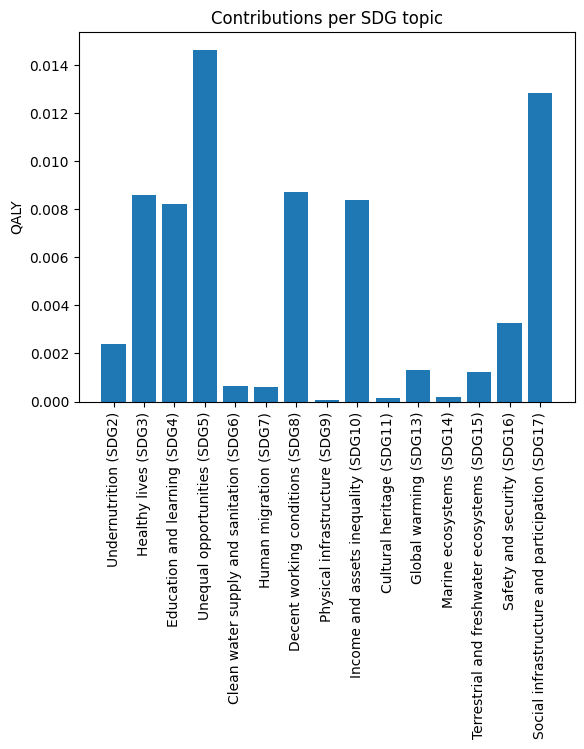

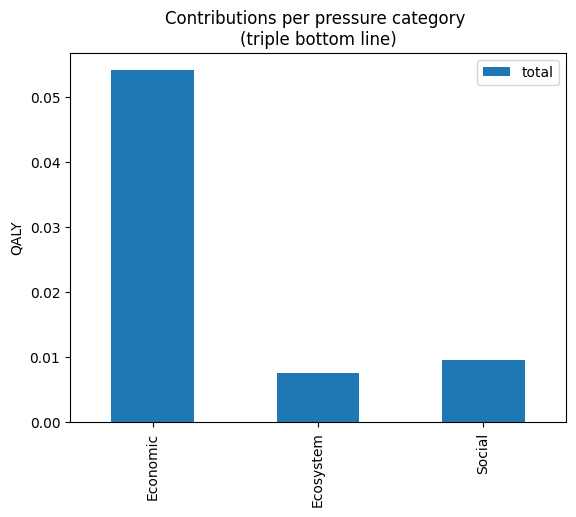

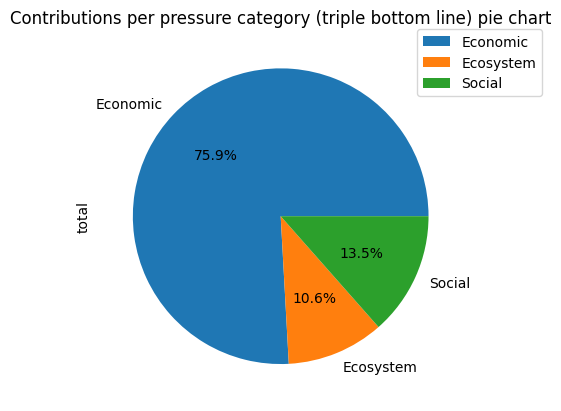

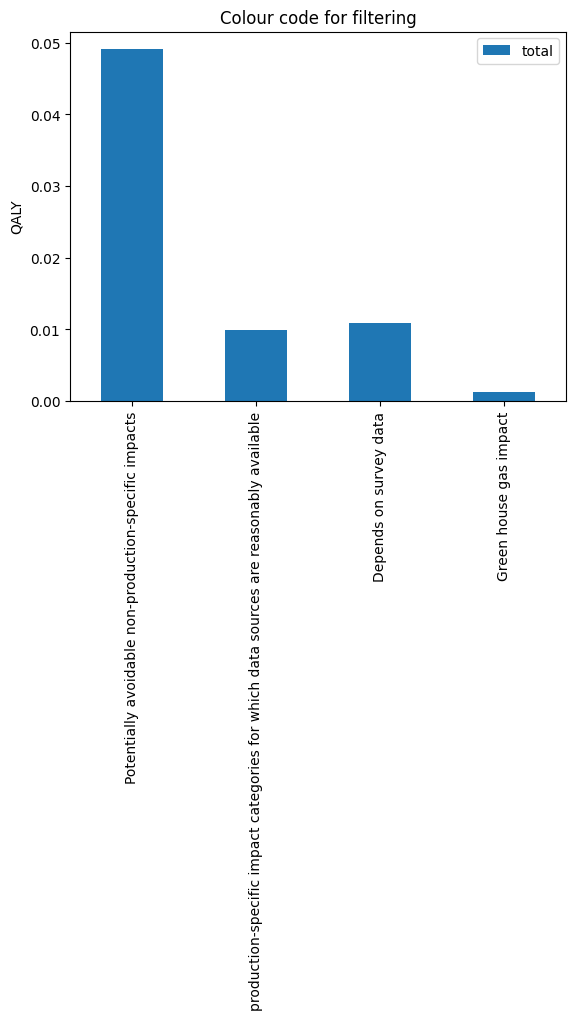

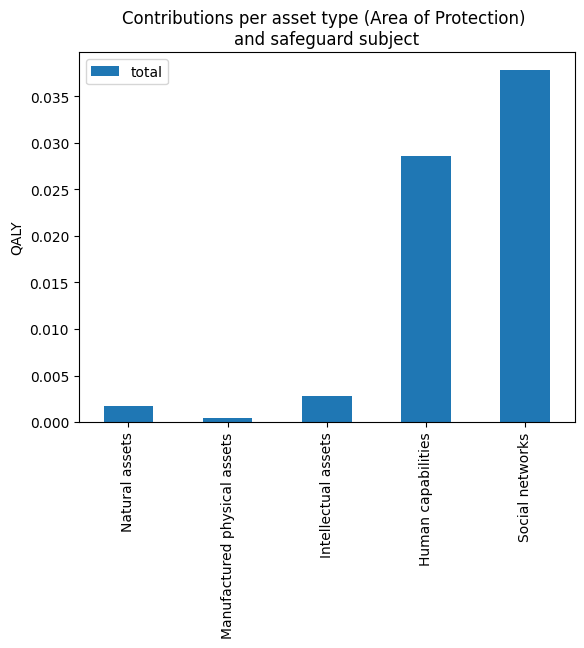

C:\Users\u0135744\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


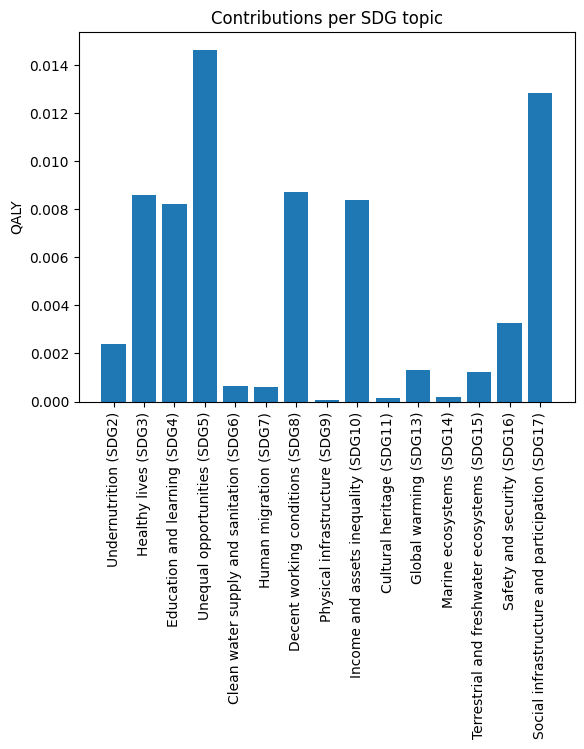

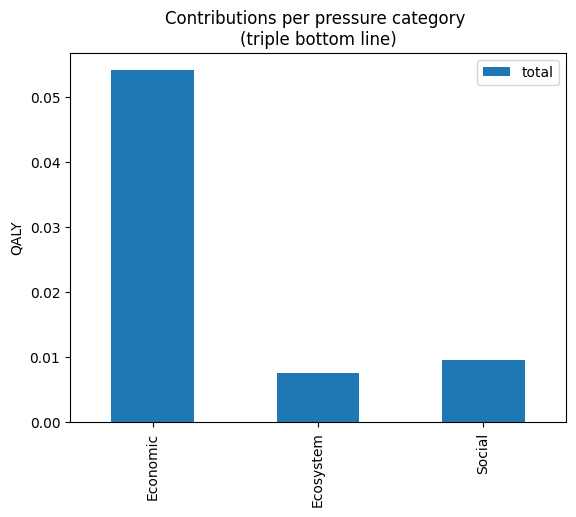

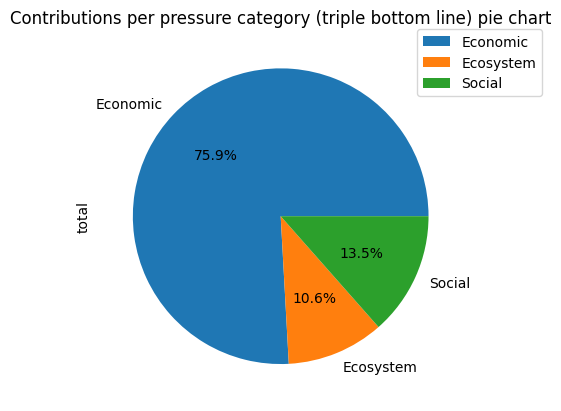

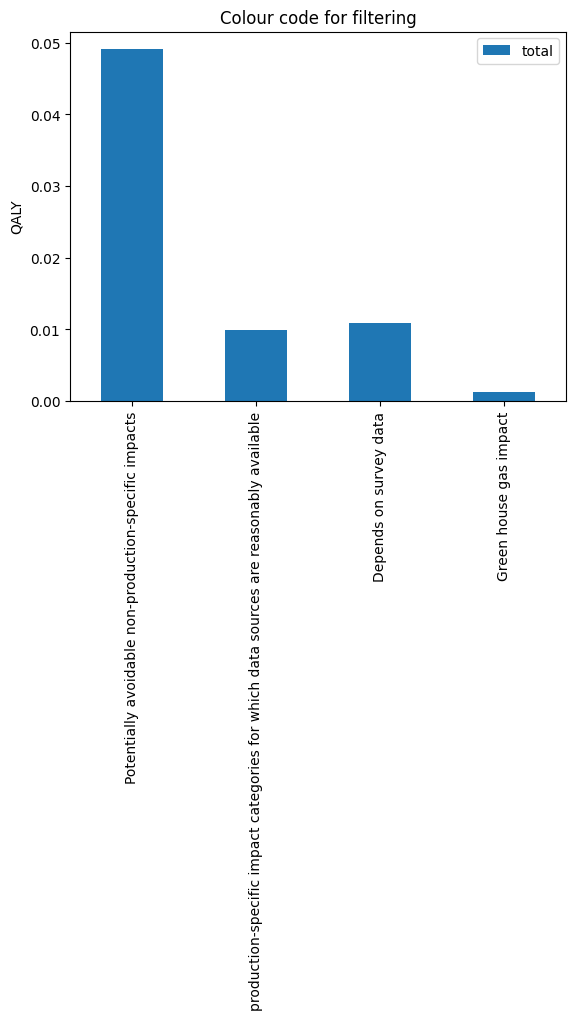

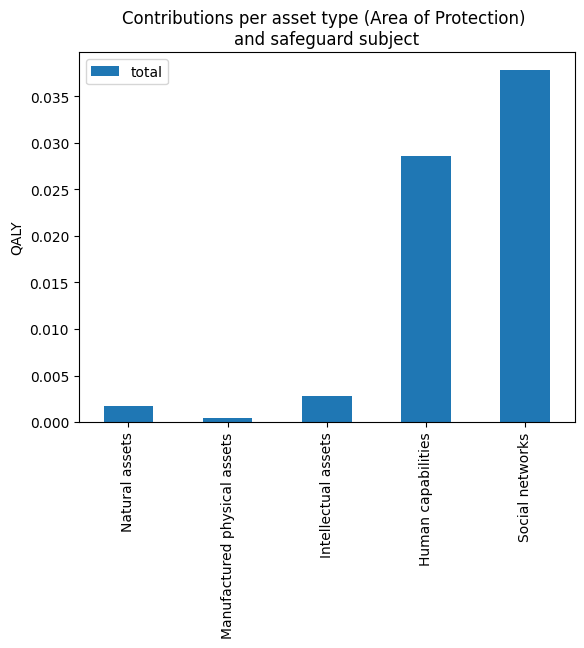

In [35]:
max_y = -1     # For plots

# .png: Save with transparece background
draw_plots(extra, new_folder_name + '/' + 'png', '.png', max_y=max_y)

# .jpg: Save with white background
draw_plots(extra, new_folder_name + '/' + 'jpg', '.jpg', max_y=max_y)

In [36]:
"""
Calculates the Total QALY (Quality-Adjusted Life Year) based on the given data.

Returns:
non_production (float): The value of potentially avoidable non-production-specific impacts.
Production_specific_impact (float): The value of production-specific impact categories for which data sources are reasonably available.
monetary_redistribution (float): The value of monetary redistribution.
Total_QALY (float): The total QALY value calculated based on the given data.
"""
# df_tsf_x_tutorial, '(Equity-weighted direct income by industry, normalised to sum to unweighted country direct income, Meuro2011)'
Equity_weighted_DIBI = df_tsf_x_tutorial.iloc[-2]['Sum'][0]
Sum_direct_income_BI = df_tsf_x_tutorial.iloc[-3]['Sum'][0]
Value_Added = df_tsf_x_tutorial.iloc[-4]['Sum'][0]

Current_value_added = (Equity_weighted_DIBI) * (1000000 / 388000) * 3.8 * dollar_per_euro
monetary_redistribution  = (Equity_weighted_DIBI - Sum_direct_income_BI) * (1000000 / 388000) * 3.8 * dollar_per_euro


Production_specific_impact = extra.loc['Depends on survey data'][0] + extra.loc['Green house gas impact'][0] + extra.loc['production-specific impact categories for which data sources are reasonably available'][0]

Total_QALY = extra.loc['Potentially avoidable non-production-specific impacts'][0] + Production_specific_impact - monetary_redistribution


non_production = extra.loc['Potentially avoidable non-production-specific impacts'][0] 
print('non_production =',non_production)
print('Production_specific_impact =', Production_specific_impact)
print ('monetary_redistribution =',monetary_redistribution)
print ('Total_QALY =',Total_QALY)

non_production = 0.04909254271643007
Production_specific_impact = 0.02227026261172292
monetary_redistribution = -0.03643510397138136
Total_QALY = 0.10779790929953435


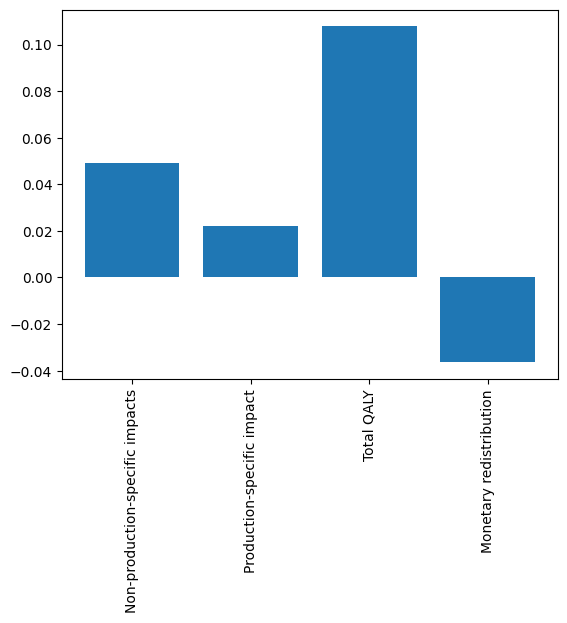

In [37]:
# Plots the conclusion of the sustainability performance of 2 things.

conc_data = [non_production, Production_specific_impact, Total_QALY, monetary_redistribution]
conc_plot_label = ['Non-production-specific impacts', 'Production-specific impact', 'Total QALY', 'Monetary redistribution']
plt.xticks(rotation = 90)
# to set a title for your plot, uncommend the bottom line
# plt.title('title')
plt.bar(conc_plot_label, conc_data)
plt.savefig(new_folder_name + '/' + 'Conclusion plot' + '.jpg', bbox_inches='tight', dpi=100)
plt.show()

In [38]:
# Save extra to file then close the writer file.
extra.to_excel(writer, sheet_name='Total')
writer.close()

In [39]:
# Display df_tsf_x_tutorial
df_tsf_x_tutorial

AU  \
                                                   Cultivation of paddy rice   
                                                                       i01.a   
                                                                      A_PARI   
(N1, Sub-soil ressource use)                                    6.962902e-12   
(N2, Marine biomass and biodiversity, global wa...              1.813224e-10   
(N3, Marine biomass and biodiversity, overexplo...              1.988258e-11   
(N4, Freshwater biomass and biodiversity, globa...              2.031685e-10   
(N5, Freshwater biomass and biodiversity, overe...              2.107940e-11   
...                                                                      ...   
(H35, Health impacts, global warming (partly in...              2.220485e-09   
(Value Added, Meuro2011)                                        9.677619e-10   
(Sum direct income by industry , Meuro2011)                     9.469300e-10   
(Globally equity-weighted direct income by indu...              1.382745e-10   
Sum                                                             8.885870e-09   

                                                                         \
                                                   Cultivation of wheat   
                                                                  i01.b   
                                                                 A_WHEA   
(N1, Sub-soil ressource use)                               1.195406e-10   
(N2, Marine biomass and biodiversity, global wa...         5.826010e-10   
(N3, Marine biomass and biodiversity, overexplo...         3.413485e-10   
(N4, Freshwater biomass and biodiversity, globa...         6.527938e-10   
(N5, Freshwater biomass and biodiversity, overe...         3.618957e-10   
...                                                                 ...   
(H35, Health impacts, global warming (partly in...         7.134565e-09   
(Value Added, Meuro2011)                                   1.693074e-08   
(Sum direct income by industry , Meuro2011)                1.625710e-08   
(Globally equity-weighted direct income by indu...         5.287488e-09   
Sum                                                        1.721832e-07   

                                                                                     \
                                                   Cultivation of cereal grains nec   
                                                                              i01.c   
                                                                             A_OCER   
(N1, Sub-soil ressource use)                                           6.698989e-11   
(N2, Marine biomass and biodiversity, global wa...                     2.375791e-10   
(N3, Marine biomass and biodiversity, overexplo...                     1.912898e-10   
(N4, Freshwater biomass and biodiversity, globa...                     2.662031e-10   
(N5, Freshwater biomass and biodiversity, overe...                     2.028043e-10   
...                                                                             ...   
(H35, Health impacts, global warming (partly in...                     2.909408e-09   
(Value Added, Meuro2011)                                               9.399687e-09   
(Sum direct income by industry , Meuro2011)                            9.110387e-09   
(Globally equity-weighted direct income by indu...                     1.052189e-09   
Sum                                                                    5.169339e-08   

                                                                                           \
                                                   Cultivation of vegetables, fruit, nuts   
                                                                                    i01.d   
                                                                                   A_FVEG   
(N1, Sub-soil ressource use)                                         

In [40]:
# Creates a new pandas DataFrame with the same index as df_tsf_x_tutorial.columns and columns as indices.

df_calculated_cols = pd.DataFrame(index = df_tsf_x_tutorial.columns, columns = indices)
df_calculated_cols

sum (N1 to H35)  \
                                                                                      
AU  Cultivation of paddy rice                          i01.a A_PARI             NaN   
    Cultivation of wheat                               i01.b A_WHEA             NaN   
    Cultivation of cereal grains nec                   i01.c A_OCER             NaN   
    Cultivation of vegetables, fruit, nuts             i01.d A_FVEG             NaN   
    Cultivation of oil seeds                           i01.e A_OILS             NaN   
...                                                                             ...   
WM  Recreational, cultural and sporting activities ... i92   A_RECR             NaN   
    Other service activities (93)                      i93   A_OSER             NaN   
    Private households with employed persons (95)      i95   A_PRHH             NaN   
    Extra-territorial organizations and bodies         i99   A_EXTO             NaN   
Sum                                                                             NaN   

                                                                    Potentially avoidable non-production-specific impacts  \
                                                                                                                            
AU  Cultivation of paddy rice                          i01.a A_PARI                                                NaN      
    Cultivation of wheat                               i01.b A_WHEA                                                NaN      
    Cultivation of cereal grains nec                   i01.c A_OCER                                                NaN      
    Cultivation of vegetables, fruit, nuts             i01.d A_FVEG                                                NaN      
    Cultivation of oil seeds                           i01.e A_OILS                                                NaN      
...                                                                                                                ...      
WM  Recreational, cultural and sporting activities ... i92   A_RECR                                                NaN      
    Other service activities (93)                      i93   A_OSER                                                NaN      
    Private households with employed persons (95)      i95   A_PRHH                                                NaN      
    Extra-territorial organizations and bodies         i99   A_EXTO                                                NaN      
Sum                                                                                                                NaN      

                                                                    production-specific impact categories for which data sources are reasonably available  \
                                                                                                                                                            
AU  Cultivation of paddy rice                          i01.a A_PARI                                                NaN                                      
    Cultivation of wheat                               i01.b A_WHEA                                                NaN                                      
    Cultivation of cereal grains nec                   i01.c A_OCER                                                NaN                                      
    Cultivation of vegetables, fruit, nuts             i01.d A_FVEG                                                NaN                                      
    Cultivation of oil seeds                           i01.e A_OILS                                                NaN                                      
...                                                                                                                ...                                      
WM  Recreational, cultural and sporting activities ...

# Vecotizied

In [41]:
"""
Makes a copy of the 'df_tsf_x_tutorial' dataframe and changes its index to the first element of each tuple in the original index.
It then prints the new index.
"""

df_tsf_x_tutorial_vect = df_tsf_x_tutorial.copy()
df_tsf_x_tutorial_vect.index = [i[0] for i in df_tsf_x_tutorial_vect.index]
print(df_tsf_x_tutorial_vect.index)

Index(['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'M1', 'M2', 'M3',
       'M4', 'M5', 'M6', 'I1', 'I2', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7',
       'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17',
       'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24', 'H25', 'H26', 'H27',
       'H28', 'H29', 'H30', 'H31', 'H32', 'H33', 'H34', 'S1', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15',
       'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'H35',
       'Value Added', 'Sum direct income by industry ',
       'Globally equity-weighted direct income by industry, PPP corrected',
       'S'],
      dtype='object')


In [42]:

def calculate_values(df_tsf_x_tutorial, df_tsf_x_tutorial_vect, indices):
    """
    Calculates values for each item in the given dataframe using the provided indices.

    Parameters:
    df_tsf_x_tutorial (pandas.DataFrame): The dataframe to use for calculations.
    df_tsf_x_tutorial_vect (pandas.DataFrame): The vectorized dataframe to use for calculations.
    indices (dict): A dictionary containing the indices for each item.

    Returns:
    pandas.DataFrame: A dataframe containing the calculated values for each item.
    """

    # Create dataframe for calculated values. This takes a couple of minutes.
    df_calculated_cols = pd.DataFrame(index = df_tsf_x_tutorial.columns, columns = indices)

    # Calculate values for each item
    for item in indices:
        inds = indices[item]
        if item in ['Economic', 'Ecosystem', 'Social']:
            pers_inds = []
            pure_inds = []
            for i in inds:
                if '%' in i:
                    pers_inds.append(i)
                    pure_inds.append(i[:i.index('%')])
                else:
                    pure_inds.append(i)
            df_tsf_x_tutorial_vect_pers = df_tsf_x_tutorial_vect.loc[pure_inds].copy()
            for i in pers_inds:
                df_tsf_x_tutorial_vect_pers.loc[i[:i.index('%')]] *= (float(i[i.index('%')+1:])/100)

            df_calculated_cols[item] = df_tsf_x_tutorial_vect_pers.sum()

        else:          
            df_calculated_cols[item] = df_tsf_x_tutorial_vect.loc[inds].sum()


    return df_calculated_cols

df_calculated_cols = calculate_values(df_tsf_x_tutorial, df_tsf_x_tutorial_vect, indices)

In [43]:
# Display transposed df_calculated_cols
df_calculated_cols.transpose()

AU  \
                                                   Cultivation of paddy rice   
                                                                       i01.a   
                                                                      A_PARI   
sum (N1 to H35)                                                 8.885870e-09   
Potentially avoidable non-production-specific i...              3.124117e-09   
production-specific impact categories for which...              5.937029e-10   
Depends on survey data                                          1.857505e-09   
Green house gas impact                                          3.310545e-09   
Natural assets                                                  1.197938e-09   
Manufactured physical assets                                    1.041440e-10   
Intellectual assets                                             1.253939e-10   
Human capabilities                                              4.182245e-09   
Social networks                                                 3.276148e-09   
SDG1                                                            5.245655e-10   
SDG2                                                            3.600203e-11   
SDG3                                                            6.024035e-10   
SDG4                                                            6.140364e-10   
SDG5                                                            1.546112e-09   
SDG6                                                            1.391545e-12   
SDG7                                                            1.265671e-10   
SDG8                                                            1.116927e-09   
SDG9                                                            6.887661e-13   
SDG10                                                           3.564471e-10   
SDG11                                                           1.752781e-11   
SDG12                                                           0.000000e+00   
SDG13                                                           3.310545e-09   
SDG14                                                           1.988258e-11   
SDG15                                                           1.499455e-10   
SDG16                                                           3.122365e-10   
SDG17                                                           6.751582e-10   
Economic                                                        4.205461e-09   
Ecosystem                                                       3.760925e-09   
Social                                                          9.194835e-10   

                                                                         \
                                                   Cultivation of wheat   
                                                                  i01.b   
                                                                 A_WHEA   
sum (N1 to H35)                                            1.721832e-07   
Potentially avoidable non-production-specific i...         1.194634e-07   
production-specific impact categories for which...         1.019282e-08   
Depends on survey data                                     3.189004e-08   
Green house gas impact                                     1.063700e-08   
Natural assets                                             5.689043e-09   
Manufactured physical assets                               2.075154e-09   
Intellectual assets                                        4.511628e-09   
Human capabilities                                         6.630220e-08   
Social networks                                            9.360522e-08   
SDG1                                                       1.929482e-08   
SDG2                                                       7.378506e-10   
SDG3                                                       1.423733e-08   
SDG4                                                       2.107148e-08   
SDG

In [44]:

# Calculates the intrinsic and instrumental share values for all impact categories.
share_values = pd.DataFrame(index=['Intrinsic share', 'Instrumental share'], columns=all_impact_category)

share_values.loc['Intrinsic share'] = [0, 8.3/8.7, 8.3/8.7, (9.3-0.02)/9.3, (9.3-0.02)/9.3, 0, 0, 31.2/35.5, 31.2/35.5, 0, 0,
                                         0, 0, 1, 1, 1, 0, 1, 1]+[0.857]*20+[1, 1, 0.857, 1, 1, 77.1/488.6, 77.1/488.6]+[
    23/145.6]*5+[1] + [0]*12+[12/12.7, 124/134.1, 0.7/7.1, 0, 8.3/9.7, 77.5/80.9, 15.4/20.4] + [1]*5
share_values.loc['Instrumental share'] = 1 - share_values.loc['Intrinsic share']

In [45]:
share_values

,N1,N2,N3,N4,N5,N6,N7,N8,N9,M1,...,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24
Intrinsic share,0,0.954023,0.954023,0.997849,0.997849,0,0,0.878873,0.878873,0,...,0.098592,0,0.85567,0.957973,0.754902,1,1,1,1,1
Instrumental share,1,0.045977,0.045977,0.002151,0.002151,1,1,0.121127,0.121127,1,...,0.901408,1,0.14433,0.042027,0.245098,0,0,0,0,0


In [46]:
# Calculates the sum of all Intrinsic and Instrumental values for each impact category.
instr_sum = pd.DataFrame(index=['Intrinsic sum', 'Instrumental sum'], columns=share_values.columns)

for i in all_impact_category:
    instr_sum[i]['Intrinsic sum'] = share_values[i]['Intrinsic share'] * df_tsf_x_tutorial['Sum'][find_index(i, df_tsf_x_tutorial)]
    instr_sum[i]['Instrumental sum'] = share_values[i]['Instrumental share'] * df_tsf_x_tutorial['Sum'][find_index(i, df_tsf_x_tutorial)]

instr_sum

,N1,N2,N3,N4,N5,N6,N7,N8,N9,M1,...,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24
Intrinsic sum,0.0,0.000069,0.000186,0.000081,0.000206,0.0,0.0,0.000238,0.000707,0.0,...,0.00006,0.0,0.000086,0.000982,0.000087,0.000054,0.000327,0.005761,0.011187,0.008226
Instrumental sum,0.000068,0.000003,0.000009,0.0,0.0,0.000007,0.000009,0.000033,0.000098,0.000074,...,0.000546,0.001074,0.000014,0.000043,0.000028,0.0,0.0,0.0,0.0,0.0


In [47]:
"""
This function takes a dataframe df_tsf_x_tutorial_vect as input and returns a subset of the dataframe
containing only the rows with all impact categories.
"""
df_tsf_x_tutorial_vect_all_impact = df_tsf_x_tutorial_vect.loc[all_impact_category]
df_tsf_x_tutorial_vect_all_impact

AU                       \
    Cultivation of paddy rice Cultivation of wheat   
                        i01.a                i01.b   
                       A_PARI               A_WHEA   
N1               6.962902e-12         1.195406e-10   
N2               1.813224e-10         5.826010e-10   
N3               1.988258e-11         3.413485e-10   
N4               2.031685e-10         6.527938e-10   
N5               2.107940e-11         3.618957e-10   
..                        ...                  ...   
S20              8.427082e-12         3.222439e-10   
S21              3.257651e-11         1.245696e-09   
S22              2.444993e-10         9.349430e-09   
S23              4.747620e-10         1.815446e-08   
S24              3.491079e-10         1.334957e-08   

                                                                             \
    Cultivation of cereal grains nec Cultivation of vegetables, fruit, nuts   
                               i01.c                                  i01.d   
                              A_OCER                                 A_FVEG   
N1                      6.698989e-11                           6.567442e-11   
N2                      2.375791e-10                           2.350042e-10   
N3                      1.912898e-10                           1.875335e-10   
N4                      2.662031e-10                           2.633179e-10   
N5                      2.028043e-10                           1.988219e-10   
..                               ...                                    ...   
S20                     6.412522e-11                           1.873629e-10   
S21                     2.478884e-10                           7.242875e-10   
S22                     1.860498e-09                           5.436058e-09   
S23                     3.612664e-09                           1.055559e-08   
S24                     2.656509e-09                           7.761865e-09   

                                                                    \
    Cultivation of oil seeds Cultivation of sugar cane, sugar beet   
                       i01.e                                 i01.f   
                      A_OILS                                A_SUGB   
N1              4.947407e-10                          2.505861e-11   
N2              2.098235e-09                          1.341372e-10   
N3              1.412733e-09                          7.155492e-11   
N4              2.351035e-09                          1.502984e-10   
N5              1.497772e-09                          7.586211e-11   
..                       ...                                   ...   
S20             1.576468e-09                          4.663476e-11   
S21             6.094142e-09                          1.802757e-10   
S22             4.573889e-08                          1.353039e-09   
S23             8.881450e-08                          2.627293e-09   
S24             6.530818e-08                          1.931933e-09   

                                                                               \
    Cultivation of plant-based fibers Cultivation of crops nec Cattle farming   
                                i01.g                    i01.h          i01.i   
                               A_FIBR                   A_OTCR         A_CATL   
N1                       3.530576e-10             2.710195e-13   5.662515e-11   
N2                       4.000094e-10             7.700966e-13   6.411185e-09   
N3                       1.008157e-09             7.738968e-13   1.616932e-10   
N4                       4.482033e-10             8.628794e-13   7.183617e-09   
N5                       1.068842e-09             8.204809e-13   1.714262e-10   
..                                ...                      ...            ...   
S20                      2.055298e-09             1.169201e-12   1.689763e-10   
S21                      7.945153e-09             4.519771e-12   6.532105e-10   
S22    

In [48]:
# Calculates the Intrinsic and Instrumental columns by multiplying the share_values with the df_tsf_x_tutorial_vect_all_impact dataframe.

df_instr = (share_values @ df_tsf_x_tutorial_vect_all_impact).transpose()
df_instr

Intrinsic share  \
                                                                                      
AU  Cultivation of paddy rice                          i01.a A_PARI             0.0   
    Cultivation of wheat                               i01.b A_WHEA             0.0   
    Cultivation of cereal grains nec                   i01.c A_OCER             0.0   
    Cultivation of vegetables, fruit, nuts             i01.d A_FVEG             0.0   
    Cultivation of oil seeds                           i01.e A_OILS             0.0   
...                                                                             ...   
WM  Recreational, cultural and sporting activities ... i92   A_RECR        0.000001   
    Other service activities (93)                      i93   A_OSER        0.000001   
    Private households with employed persons (95)      i95   A_PRHH             0.0   
    Extra-territorial organizations and bodies         i99   A_EXTO             0.0   
Sum                                                                        0.049943   

                                                                    Instrumental share  
                                                                                        
AU  Cultivation of paddy rice                          i01.a A_PARI                0.0  
    Cultivation of wheat                               i01.b A_WHEA                0.0  
    Cultivation of cereal grains nec                   i01.c A_OCER                0.0  
    Cultivation of vegetables, fruit, nuts             i01.d A_FVEG                0.0  
    Cultivation of oil seeds                           i01.e A_OILS                0.0  
...                                                                                ...  
WM  Recreational, cultural and sporting activities ... i92   A_RECR                0.0  
    Other service activities (93)                      i93   A_OSER                0.0  
    Private households with employed persons (95)      i95   A_PRHH                0.0  
    Extra-territorial organizations and bodies         i99   A_EXTO                0.0  
Sum                                                                            0.02142  

[7873 rows x 2 columns]

In [49]:
# Concatenates all dataframes that need to be sorted.

df_concat_all_output = pd.concat([df_tsf_x_tutorial, df_calculated_cols.transpose(), df_instr.transpose()])
df_concat_all_output

AU  \
                                                   Cultivation of paddy rice   
                                                                       i01.a   
                                                                      A_PARI   
(N1, Sub-soil ressource use)                                             0.0   
(N2, Marine biomass and biodiversity, global wa...                       0.0   
(N3, Marine biomass and biodiversity, overexplo...                       0.0   
(N4, Freshwater biomass and biodiversity, globa...                       0.0   
(N5, Freshwater biomass and biodiversity, overe...                       0.0   
...                                                                      ...   
Economic                                                                 0.0   
Ecosystem                                                                0.0   
Social                                                                   0.0   
Intrinsic share                                                          0.0   
Instrumental share                                                       0.0   

                                                                         \
                                                   Cultivation of wheat   
                                                                  i01.b   
                                                                 A_WHEA   
(N1, Sub-soil ressource use)                                        0.0   
(N2, Marine biomass and biodiversity, global wa...                  0.0   
(N3, Marine biomass and biodiversity, overexplo...                  0.0   
(N4, Freshwater biomass and biodiversity, globa...                  0.0   
(N5, Freshwater biomass and biodiversity, overe...                  0.0   
...                                                                 ...   
Economic                                                            0.0   
Ecosystem                                                           0.0   
Social                                                              0.0   
Intrinsic share                                                     0.0   
Instrumental share                                                  0.0   

                                                                                     \
                                                   Cultivation of cereal grains nec   
                                                                              i01.c   
                                                                             A_OCER   
(N1, Sub-soil ressource use)                                                    0.0   
(N2, Marine biomass and biodiversity, global wa...                              0.0   
(N3, Marine biomass and biodiversity, overexplo...                              0.0   
(N4, Freshwater biomass and biodiversity, globa...                              0.0   
(N5, Freshwater biomass and biodiversity, overe...                              0.0   
...                                                                             ...   
Economic                                                                        0.0   
Ecosystem                                                                       0.0   
Social                                                                          0.0   
Intrinsic share                                                                 0.0   
Instrumental share                                                              0.0   

                                                                                           \
                                                   Cultivation of vegetables, fruit, nuts   
                                                                                    i01.d   
                                                                                   A_FVEG   
(N1, Sub-soil ressource use)                                         

In [50]:
# Create a list of sorted dataframes

def create_sorted_dataframes(df_concat_all_output):
    """
    This function takes a pandas DataFrame as input and returns a list of sorted DataFrames.
    Each DataFrame in the list is sorted in descending order based on its column values.
    The index of each DataFrame is set to a new column called 'index', which contains a string
    representation of the original index values.
    
    Parameters:
    df_concat_all_output (pandas.DataFrame): The input DataFrame to be sorted.
    
    Returns:
    list: A list of sorted DataFrames.
    """
    target_df_to_sort = df_concat_all_output.copy()

    dfs_sorted_list = []
    for ix, i in enumerate(target_df_to_sort.index):
        df_temp = target_df_to_sort.iloc[ix].sort_values(ascending=False)
        indexes_temp = [j[1] + ' [' + j[0] + ']' for j in df_temp.index]    

        df_sorted_temp = pd.DataFrame(df_temp.values, index=indexes_temp, columns=[i])
        # Set index to a columns
        df_sorted_temp = df_sorted_temp.reset_index()
        dfs_sorted_list.append(df_sorted_temp)
        
    return dfs_sorted_list

dfs_sorted_list = create_sorted_dataframes(df_concat_all_output)

In [51]:
# Concatenates a list of sorted dataframes horizontally.
df_sorted_by_col = pd.concat(dfs_sorted_list, axis=1)

# If you want remove indices in column A:D uncommend the bottom line
# df_sorted_by_col.index = df_tsf_x_tutorial.columns

# Display sorted columns dataframe
df_sorted_by_col

,index,"(N1, Sub-soil ressource use)",index,"(N2, Marine biomass and biodiversity, global warming)",index,"(N3, Marine biomass and biodiversity, overexploitation)",index,"(N4, Freshwater biomass and biodiversity, global warming)",index,"(N5, Freshwater biomass and biodiversity, overexploitation)",...,index,Economic,index,Ecosystem,index,Social,index,Intrinsic share,index,Instrumental share
0,[Sum],0.000068,[Sum],0.000072,[Sum],0.000195,[Sum],0.000081,[Sum],0.000206,...,[Sum],0.054146,[Sum],0.007591,[Sum],0.009625,[Sum],0.049943,[Sum],0.02142
1,Manufacture of rubber and plastic products (25...,0.000009,Chemicals nec [FR],0.000016,Manufacture of rubber and plastic products (25...,0.000025,Chemicals nec [FR],0.000018,Manufacture of rubber and plastic products (25...,0.000027,...,Manufacture of rubber and plastic products (25...,0.005549,Manufacture of rubber and plastic products (25...,0.000626,Manufacture of rubber and plastic products (25...,0.001226,Manufacture of rubber and plastic products (25...,0.004899,Manufacture of rubber and plastic products (25...,0.002502
2,"Wholesale trade and commission trade, except o...",0.000005,"Plastics, basic [FR]",0.000006,"Wholesale trade and commission trade, except o...",0.000014,"Plastics, basic [FR]",0.000007,"Wholesale trade and commission trade, except o...",0.000014,...,"Retail trade, except of motor vehicles and mot...",0.004557,Chemicals nec [FR],0.00047,"Wholesale trade and commission trade, except o...",0.000654,Other business activities (74) [FR],0.003182,Other business activities (74) [FR],0.001614
3,Other business activities (74) [FR],0.000004,Manufacture of rubber and plastic products (25...,0.000002,Other business activities (74) [FR],0.00001,Manufacture of rubber and plastic products (25...,0.000002,Other business activities (74) [FR],0.000011,...,Other business activities (74) [FR],0.004049,"Wholesale trade and commission trade, except o...",0.000331,Other business activities (74) [FR],0.000501,"Retail trade, except of motor vehicles and mot...",0.003133,"Retail trade, except of motor vehicles and mot...",0.001563
4,"Plastics, basic [FR]",0.000003,Production of electricity by gas [FR],0.000002,"Plastics, basic [FR]",0.000008,Production of electricity by gas [FR],0.000002,"Plastics, basic [FR]",0.000008,...,"Wholesale trade and commission trade, except o...",0.00237,"Plastics, basic [FR]",0.000282,"Plastics, basic [FR]",0.000364,"Wholesale trade and commission trade, except o...",0.002217,"Wholesale trade and commission trade, except o...",0.001139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7868,Cultivation of oil seeds [ID],-0.0,Cultivation of oil seeds [IN],-0.0,Cultivation of oil seeds [ID],-0.0,Cultivation of oil seeds [IN],-0.0,Cultivation of oil seeds [ID],-0.0,...,Cultivation of oil seeds [WF],-0.000192,Processing vegetable oils and fats [IN],-0.000013,Processing vegetable oils and fats [IN],-0.000013,Cultivation of oil seeds [WF],-0.000151,Cultivation of oil seeds [WF],-0.000052
7869,Processing vegetable oils and fats [ID],-0.0,Steam and hot water supply [FR],-0.0,Processing vegetable oils and fats [ID],-0.0,Steam and hot water supply [FR],-0.0,Processing vegetable oils and fats [ID],-0.0,...,Cultivation of oil seeds [ID],-0.000331,Processing vegetable oils and fats [ID],-0.000015,Processing vegetable oils and fats [ID],-0.000018,Cultivation of oil seeds [ID],-0.000273,Cultivation of oil seeds [ID],-0.000082
7870,Cultivation of oil seeds [IN],-0.0,Processing vegetable oils and fats [WA],-0.0,Cultivation of oil seeds [IN],-0.000001,Processing vegetable oils and fats [WA],-0.0,Cultivation of oil seeds [IN],-0.000001,...,Processing vegetable oils and fats [WA],-0.000841,Cultivation of oil seeds [IN],-0.00003,Cultivation of oil seeds [IN],-0.000031,Cultivation of oil seeds [WA],-0.000695,Cultivation of oil seeds [WA],-0.000236
7871,Cultivation of oil seeds [WA],-0.0,Cultivation of oil seeds [ID],-0.0,Cultivation of oil seeds 

In [ ]:
# Saves sorted columns to an Excel file.
result_excel_file_path = result_excel_path + f'social_footprint_sorted_output_{sf_date}.xlsx'

writer_sorted = pd.ExcelWriter(result_excel_file_path)
df_sorted_by_col.to_excel(writer_sorted, sheet_name = "Individual", merge_cells = False, index=False)
df_ty_xlsx.to_excel(writer_sorted, sheet_name = "final_demand", merge_cells = False)
writer_sorted.close()